In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
data_raw = pd.read_csv("f1_clean.csv")
data_raw.head()

,raceId,race,year,circuit,constructor,driver,qualifyingPos,position,points,teammate
0,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Ferrari,ALO,3,1,25.0,OTHER
1,337,Bahrain Grand Prix,2010,Bahrain International Circuit,McLaren,HAM,4,3,15.0,OTHER
2,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Red Bull,VET,1,4,12.0,OTHER
3,337,Bahrain Grand Prix,2010,Bahrain International Circuit,Williams,HUL,13,14,0.0,OTHER
4,338,Australian Grand Prix,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,4,12.0,OTHER


Remove unused columns

In [4]:
data_train = data_raw[["year", "circuit", "constructor", "driver", "qualifyingPos", "teammate", "position", "points"]]
data_train

,year,circuit,constructor,driver,qualifyingPos,teammate,position,points
0,2010,Bahrain International Circuit,Ferrari,ALO,3,OTHER,1,25.0
1,2010,Bahrain International Circuit,McLaren,HAM,4,OTHER,3,15.0
2,2010,Bahrain International Circuit,Red Bull,VET,1,OTHER,4,12.0
3,2010,Bahrain International Circuit,Williams,HUL,13,OTHER,14,0.0
4,2010,Albert Park Grand Prix Circuit,Ferrari,ALO,3,OTHER,4,12.0
...,...,...,...,...,...,...,...,...
2733,2023,Autódromo Hermanos Rodríguez,Alfa Romeo,BOT,9,ZHO,15,0.0
2734,2023,Autódromo Hermanos Rodríguez,Aston Martin,STR,0,ALO,17,0.0
2735,2023,Autódromo Hermanos Rodríguez,Aston Martin,ALO,13,STR,0,0.0
2736,2023,Autódromo Hermanos Rodríguez,Haas F1 Team,MAG,16,HUL,0,0.0


## Create a model using all the data

Separate data from 2023 as this will be used to validate model performance.

Apply One Hot Encoding to the following categorical columns:
- constructor
- driver
- circuit
- teammate

In [5]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])
one_hot_encoded_data

,year,qualifyingPos,position,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,2010,3,1,25.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2010,4,3,15.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2010,1,4,12.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2010,13,14,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2010,3,4,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,2023,0,17,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,2023,13,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,2023,16,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def standard_scaler_scale(data):
    return (data - data.mean()) / data.std()

def standard_scaler_unscale(data, mean, std):
    return data * std + mean

Use StandardScaler to scale qualifyingPos to -1, 1

In [7]:
data_train_scaled = one_hot_encoded_data.copy()
data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
data_train_scaled.position = standard_scaler_scale(one_hot_encoded_data.position)

data_train_scaled

,year,qualifyingPos,position,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,2010,-1.056312,-1.067674,25.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2010,-0.875109,-0.682244,15.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2010,-1.418718,-0.489530,12.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2010,0.755719,1.437619,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2010,-1.056312,-0.489530,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,0.030906,1.630334,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,2023,-1.599921,2.015764,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,2023,0.755719,-1.260389,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,2023,1.299328,-1.260389,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_set = data_train_scaled[data_train_scaled.year != 2023]
test_set = data_train_scaled[data_train_scaled.year == 2023]

In [9]:
X_train = train_set.drop(['position', 'year'],axis = 1)
X_train

,qualifyingPos,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
0,-1.056312,25.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.875109,15.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.418718,12.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.755719,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.056312,12.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,1.480531,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2458,1.661734,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2459,1.299328,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2460,-0.693906,0.0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
y_train = train_set['position']
y_train

0      -1.067674
1      -0.682244
2      -0.489530
3       1.437619
4      -0.489530
          ...   
2457    1.437619
2458    1.630334
2459    2.015764
2460    2.208479
2461   -1.260389
Name: position, Length: 2462, dtype: float64

0.026076049932034485


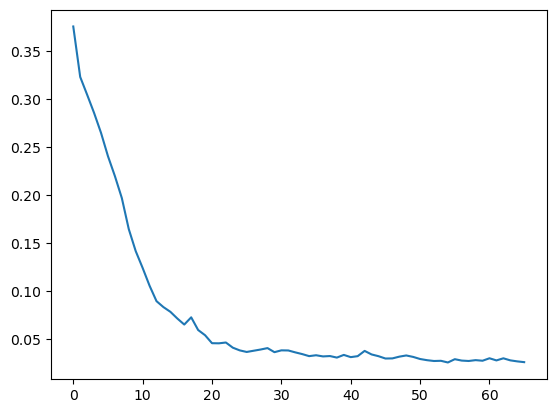

In [11]:
# model 
regr = MLPRegressor(
    hidden_layer_sizes=(500, 250, 100, 50), 
    max_iter=500,
    random_state=203043043
    ).fit(X_train, y_train)

plt.plot(regr.loss_curve_)
print(regr.best_loss_)

Use 2023 data to test model performance

In [12]:
X_test = test_set.drop(['position', 'year'],axis = 1)
X_test

,qualifyingPos,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,-1.418718,25.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2463,-1.237515,18.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2464,-0.693906,15.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2465,-0.875109,12.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2466,-0.331500,10.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,0.030906,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,-1.599921,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,0.755719,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,1.299328,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
y_test = test_set.position

(array([ 3., 11., 21., 25., 17., 19., 17., 21., 23., 16., 20., 17., 12.,
        16., 14.,  7.,  7.,  4.,  4.,  2.]),
 array([-1.  , -0.05,  0.9 ,  1.85,  2.8 ,  3.75,  4.7 ,  5.65,  6.6 ,
         7.55,  8.5 ,  9.45, 10.4 , 11.35, 12.3 , 13.25, 14.2 , 15.15,
        16.1 , 17.05, 18.  ]),
 <BarContainer object of 20 artists>)

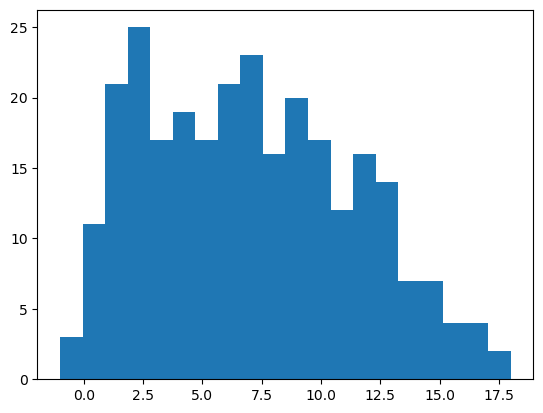

In [14]:
pred = regr.predict(X_test)
# resid = abs(y_test - pred)

pred_unscaled = standard_scaler_unscale(pred, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
y_test_unscaled = standard_scaler_unscale(y_test, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
plt.hist(pred_unscaled, bins = 20)
# plt.hist(y_test_unscaled, bins = 20)
# plt.hist((pred_unscaled - y_test_unscaled), bins = 30)

In [75]:
pred

array([ 8.58863110e+00,  1.18829391e+01,  1.00862215e+01,  2.27992156e+00,
        3.34460369e+00,  7.53024608e+00,  3.29157979e+00,  9.29616894e+00,
       -1.69037578e-01,  1.46027702e+01,  9.60837692e+00,  1.52792123e+01,
        7.09358431e+00,  9.16184306e+00,  8.70364117e+00,  4.38674305e+00,
        3.48171005e+00,  4.47211635e+00,  1.98599943e+00,  8.57649104e+00,
        6.25771761e+00,  6.88143575e+00,  2.73403329e+00,  8.32605266e+00,
        5.58404481e+00,  7.21442760e+00,  9.88882881e+00,  7.95628210e+00,
        6.75463592e+00,  1.05895507e+01,  9.97806057e+00,  1.09597222e+00,
        1.48092344e+01,  1.35288101e+01,  1.48313581e-01,  2.06122100e+00,
        8.49288293e+00,  1.13226834e+01,  1.63148751e+00,  8.02541440e+00,
       -1.09081740e-01,  9.26566244e+00,  1.39703326e+01,  7.11657445e+00,
        3.74595115e-01,  1.00443203e+01,  1.01122518e+01,  8.73172199e+00,
        9.29578067e-01,  1.16094181e+01,  6.26162837e+00,  1.61154470e+00,
        5.06483283e-01,  

In [15]:
this_season = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
this_season

,year,qualifyingPos,position,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,2023,1,1,25.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2463,2023,2,2,18.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2464,2023,5,3,15.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2465,2023,4,4,12.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2466,2023,7,5,10.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,2023,0,17,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,2023,13,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,2023,16,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
one_hot_testing

,year,qualifyingPos,position,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,2023,1,1,25.0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2463,2023,2,2,18.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2464,2023,5,3,15.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2465,2023,4,4,12.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2466,2023,7,5,10.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2023,9,15,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,2023,0,17,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,2023,13,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,2023,16,0,0.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_test = one_hot_testing.drop(['position', 'year'],axis = 1)
X_test

,qualifyingPos,points,circuit_Albert Park Grand Prix Circuit,circuit_Autodromo Enzo e Dino Ferrari,circuit_Autodromo Nazionale di Monza,circuit_Autódromo Hermanos Rodríguez,circuit_Autódromo José Carlos Pace,circuit_Bahrain International Circuit,circuit_Baku City Circuit,circuit_Circuit Gilles Villeneuve,...,teammate_PER,teammate_RAI,teammate_RIC,teammate_RUS,teammate_SAI,teammate_STR,teammate_TSU,teammate_VER,teammate_VET,teammate_ZHO
2462,1,25.0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2463,2,18.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2464,5,15.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2465,4,12.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2466,7,10.0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,9,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2734,0,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2735,13,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2736,16,0.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_test = one_hot_testing['position']
y_test[:20]

2462     1
2463     2
2464     3
2465     4
2466     5
2467     6
2468     7
2469     8
2470     9
2471    10
2472    11
2473    13
2474    15
2475    16
2476    17
2477     0
2478     0
2479     1
2480     2
2481     3
Name: position, dtype: int64

In [19]:
pred_vals = standard_scaler_unscale(regr.predict(X_test), one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
pred_vals

array([  1,   2,   4,   4,   5,   6,   6,   5,  -3,  -2,  -5,  -3,   0,
        -3,  -3,  -4,  -2,   1,   4,   3,   4,   6,   6,   2,   6,   5,
         0,  -6,   2,  -2,  -9,   0,  -4,   9,   1,   2,   3,   6,   4,
         3,   4,  -4,  -4,   0,  -9,   0,  -7,  -3,   6,  -1,  -7,   1,
         3,   3,   5,   5,   6,   6,   4,   4,   1,   0,  -2,  -2,   0,
         1,   2,  -4,   1,   3,   3,   4,   6,   6,   7,   5,   7,  12,
         3,   9,  11, -12,   7,   8,  13,   1,   3,   5,   5,   5,   7,
         7,   8,   6,  10, -10,   3,  17,   4,  12,   6,   9,   1,   2,
         3,   5,   3,   5,   7,   7,   7,  10,   5,   6,  -2,  14,  -2,
         7,  10,   1,   2,   3,   5,   6,   6,   4,   6,   9,   4,   0,
        -7,  -7,   0,  16,  -7,   2,   1,   2,   4,   5,   2,   5,   6,
         4,  -4,   0,   6,   7,  -2,  -1,   6,   0,  -4,   1,   3,   5,
         4,   4,   6,   0,   8,  11,   5,  16,   8,  14,   1,  13,   4,
         3,   7,   2,   2,   3,   4,   6,   6,   7,   3,  11,   

In [20]:
np.mean(abs(y_test - pred_vals))

5.221014492753623

In [21]:
sum((y_test - pred_vals)**2) / len(y_test)

64.21376811594203

In [22]:
for i in range(len(pred_vals)):
    if pred_vals[i] < 0:
        pred_vals[i] = 0

In [23]:
print(sum((y_test - pred_vals)**2) / len(y_test))

48.54347826086956


## Create model using the points

0.047195895678983885
39.79710144927536


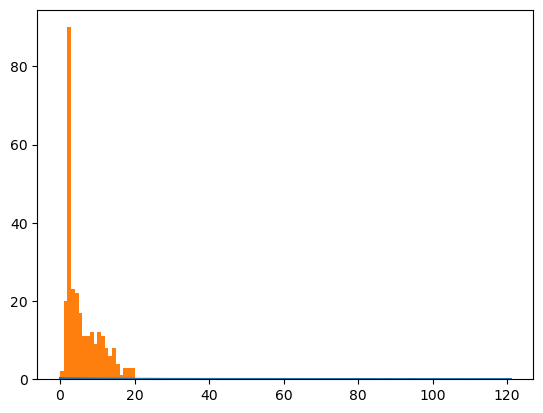

In [24]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])

data_train_scaled = one_hot_encoded_data.copy()
data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
data_train_scaled.points = standard_scaler_scale(one_hot_encoded_data.points)

train_set = data_train_scaled[data_train_scaled.year != 2023]
test_set = data_train_scaled[data_train_scaled.year == 2023]

X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
y_train = train_set['points']

regr = MLPRegressor(
    hidden_layer_sizes=(500, 250, 100, 50), 
    max_iter=500,
    random_state=203043043
    ).fit(X_train, y_train)

plt.plot(regr.loss_curve_)
print(regr.best_loss_)

X_test = test_set.drop(['position', 'year', 'points'],axis = 1)
y_test = test_set.points

pred = regr.predict(X_test)
# resid = abs(y_test - pred)

pred_unscaled = standard_scaler_unscale(pred, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
y_test_unscaled = standard_scaler_unscale(y_test, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
plt.hist(pred_unscaled, bins = 20)

this_season = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

X_test = one_hot_testing.drop(['position', 'year', 'points'],axis = 1)
y_test = one_hot_testing['points']

pred_vals = standard_scaler_unscale(regr.predict(X_test), one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)

print(sum((y_test - pred_vals)**2) / len(y_test))

In [25]:
for i in range(len(pred_vals)):
    if pred_vals[i] < 0:
        pred_vals[i] = 0

In [26]:
print(sum((y_test - pred_vals)**2) / len(y_test))

39.55434782608695


## Create model for each circuit

create a df with all possible permutations of 2023 drivers,partners, circuits and quali positions

In [27]:
import itertools
 

circuits = data_train.circuit.unique()
drivers = data_train.driver.unique()
partners = data_train.teammate.unique()
constructors = data_train.constructor.unique()
# qualifying_positions = data_train.qualifyingPos.unique()
qualifying_positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
all_list = [circuits, drivers, partners, qualifying_positions, constructors]
 
res = list(itertools.product(*all_list))


In [43]:
current_circuits = data_train.loc[data_train['year'] == 2023]['circuit'].unique()
current_drivers = data_train.loc[data_train['year'] == 2023]['driver'].unique()

current_partners = data_train.loc[data_train['year'] == 2023]['teammate'].unique()
current_constructors = data_train.loc[data_train['year'] == 2023]['constructor'].unique()



In [44]:
all_permutations = pd.DataFrame(res, columns=['circuit', 'driver', 'teammate', 'qualifyingPos', 'constructor'])
cleaned_permutations = all_permutations.loc[all_permutations['driver'] != all_permutations['teammate']]
cleaned_permutations

,circuit,driver,teammate,qualifyingPos,constructor
0,Bahrain International Circuit,ALO,OTHER,1,Ferrari
1,Bahrain International Circuit,ALO,OTHER,1,McLaren
2,Bahrain International Circuit,ALO,OTHER,1,Red Bull
3,Bahrain International Circuit,ALO,OTHER,1,Williams
4,Bahrain International Circuit,ALO,OTHER,1,Alfa Romeo
...,...,...,...,...,...
1755395,Jeddah Corniche Circuit,ZHO,TSU,20,Alpine F1 Team
1755396,Jeddah Corniche Circuit,ZHO,TSU,20,AlphaTauri
1755397,Jeddah Corniche Circuit,ZHO,TSU,20,Aston Martin
1755398,Jeddah Corniche Circuit,ZHO,TSU,20,Mercedes


model to predict pos using all data

1.6961367712064077
305474.9166666667


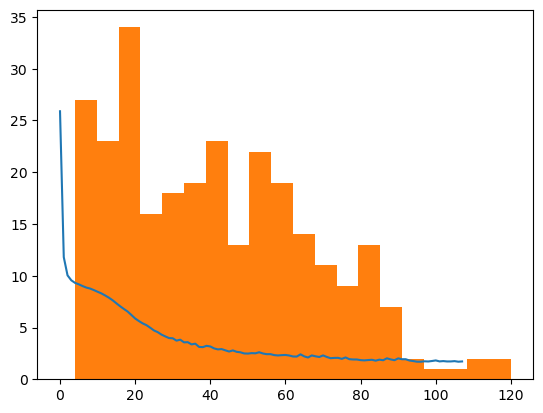

In [73]:
one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])

data_train_scaled = one_hot_encoded_data.copy()
data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
data_train_scaled.points = standard_scaler_scale(one_hot_encoded_data.points)

train_set = data_train_scaled[data_train_scaled.year != 2023]
test_set = data_train_scaled[data_train_scaled.year == 2023]

X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
y_train = train_set['position']

regr = MLPRegressor(
    hidden_layer_sizes=(500, 250, 100, 50), 
    max_iter=500,
    random_state=203043043
    ).fit(X_train, y_train)

plt.plot(regr.loss_curve_)
print(regr.best_loss_)

X_test = test_set.drop(['position', 'year', 'points'],axis = 1)
y_test = test_set.position

pred = regr.predict(X_test)
# resid = abs(y_test - pred)

pred_unscaled = standard_scaler_unscale(pred, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
y_test_unscaled = standard_scaler_unscale(y_test, 
                                        one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)
plt.hist(pred_unscaled, bins = 20)

this_season = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

X_test = one_hot_testing.drop(['position', 'year', 'points'],axis = 1)
y_test = one_hot_testing['position']

pred_vals = standard_scaler_unscale(regr.predict(X_test), one_hot_encoded_data.position.mean(), 
                                        one_hot_encoded_data.position.std()).astype(np.int32)

print(sum((y_test - pred_vals)**2) / len(y_test))

In [74]:
pred_vals

array([  26,   38,  166,   61,  253,  368,  184,  658, 1095,  818,  743,
        949,  460,  713,  541,  358,   59,   23,  756,   58,   44,  245,
         60,  571,  174,  362,  679,  875,  454,  583, 1061,  788,  946,
        175,   15,   53,   89,  213,   35,  632,  427,  957,  579,   36,
         82,  342,  468,  720,   33,  331,  236,   51,   34,   36,  198,
         61,  135,  419,  483,  272,  338,  606,  870,  887,    7,    4,
        707,  836,   36,   61,   73,  155,  313,  215,  269,   83,  493,
        887, 1150,  705,  440, 1074, 1022,  975,  791,   12,  114,  585,
        467,   44,  193,  355,  191,  737,  456, 1070,  835,  289, 1041,
         87,  977,  947,   39,   65,   69,  465,  499,  533,  438,  201,
        917,  812,  789,  304, 1104,  166, 1207,  709,  108,   30,   31,
        739,  127,  292,   38,  519,  150,  261,  393,  511, 1015,  587,
        815,   78,  912,  354,   22,   66,  233,  167,  695,  383,  339,
         70,  101, 1176,  507,  605,  964,  863,  4

test the permutations to see what the results are

In [45]:
dnf_circuit = pd.read_csv('f1_dnf_circuit.csv')
dnf_circuit.head()

,circuit,percentDnf
0,Albert Park Grand Prix Circuit,0.250000
1,Autodromo Enzo e Dino Ferrari,0.176471
2,Autodromo Nazionale di Monza,0.135294
3,Autódromo Hermanos Rodríguez,0.138211
4,Autódromo José Carlos Pace,0.136691


In [46]:
current_teammates_and_drivers = ['qualifyingPos']
for driver in current_drivers:
    current_teammates_and_drivers.append('teammate_'+ driver)
    current_teammates_and_drivers.append('driver_'+driver)
# current_teammates_and_drivers

for constructor in current_constructors:
    current_teammates_and_drivers.append('constructor_'+constructor)
# current_teammates_and_drivers.append('qualifyingPos')


In [47]:
one_hot_circuit.columns

Index(['qualifyingPos', 'circuit_Albert Park Grand Prix Circuit',
       'circuit_Autodromo Enzo e Dino Ferrari',
       'circuit_Autodromo Nazionale di Monza',
       'circuit_Autódromo Hermanos Rodríguez',
       'circuit_Autódromo José Carlos Pace',
       'circuit_Bahrain International Circuit', 'circuit_Baku City Circuit',
       'circuit_Circuit Gilles Villeneuve',
       'circuit_Circuit de Barcelona-Catalunya', 'circuit_Circuit de Monaco',
       'circuit_Circuit de Spa-Francorchamps',
       'circuit_Circuit of the Americas', 'circuit_Hungaroring',
       'circuit_Jeddah Corniche Circuit', 'circuit_Marina Bay Street Circuit',
       'circuit_Red Bull Ring', 'circuit_Silverstone Circuit',
       'circuit_Suzuka Circuit', 'circuit_Yas Marina Circuit',
       'constructor_Alfa Romeo', 'constructor_AlphaTauri',
       'constructor_Alpine F1 Team', 'constructor_Aston Martin',
       'constructor_Ferrari', 'constructor_Haas F1 Team',
       'constructor_McLaren', 'constructor_Merced

testing the model created using all data on permutation test

In [67]:
# iterate through entire dataset

all_preds = []
# do one hot encoding requires all possible combinations to be same as training set
one_hot_circuit = pd.get_dummies(cleaned_permutations, columns = ['circuit', 'constructor', 'driver', 'teammate'])

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 

    # get the data specific to the circuit
    circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]



    # need to randomly make a couple qualifying positions dnq

    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(circuit_data['qualifyingPos']))
    indices_to_replace = np.random.choice(circuit_data.index, num_values_to_replace, replace=False)
    circuit_data.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(circuit_data), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    circuit_data['all_preds'] = pred_vals     

    for driver in drivers:
        # print(i)
        # for j in partners:
        # check only for the scores w/ teammates of the current season 
    # are all averaging to 1 ..
        # find the median position for each driver
        med_pos = circuit_data.loc[circuit_data['driver_'+driver] == 1]['all_preds'].median()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})   


In [71]:
final_results

,circuit,driver,pred_pos,pred_points
0,Bahrain International Circuit,ALO,375.0,375.0
1,Bahrain International Circuit,HAM,356.0,356.0
2,Bahrain International Circuit,VET,379.0,379.0
3,Bahrain International Circuit,HUL,399.5,399.5
4,Bahrain International Circuit,PER,376.5,376.5
...,...,...,...,...
331,Autódromo Hermanos Rodríguez,NOR,404.0,404.0
332,Autódromo Hermanos Rodríguez,ALB,412.0,412.0
333,Autódromo Hermanos Rodríguez,RUS,431.0,431.0
334,Autódromo Hermanos Rodríguez,TSU,400.0,400.0


In [68]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)


,pred_pos,pred_points
driver,,
BOT,6577.5,6577.5
GRO,6574.0,6574.0
ZHO,6523.0,6523.0
RUS,6377.5,6377.5
OCO,6297.0,6297.0
STR,6247.5,6247.5
RIC,6107.0,6107.0
ALB,6088.5,6088.5
TSU,6066.5,6066.5


create individual models for each circuit to predict position

In [60]:
all_preds = []
# do one hot encoding requires all possible combinations to be same as training set
one_hot_circuit = pd.get_dummies(cleaned_permutations, columns = ['circuit', 'constructor', 'driver', 'teammate'])

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 
    one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])

    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.points = standard_scaler_scale(one_hot_encoded_data.points)

    circuit_data = data_train_scaled.loc[data_train_scaled['circuit_' + circuit] == 1]

    train_set = circuit_data[circuit_data.year != 2023]
    test_set = circuit_data[circuit_data.year == 2023]

    X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
    y_train = train_set['position']

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)


# get the data specific to the circuit from the permutations
    permute_circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]



    # need to randomly make a couple qualifying positions dnq

    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(permute_circuit_data['qualifyingPos']))
    indices_to_replace = np.random.choice(permute_circuit_data.index, num_values_to_replace, replace=False)
    permute_circuit_data.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(permute_circuit_data), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    permute_circuit_data['all_preds'] = pred_vals     

    for driver in drivers:
        # print(i)
        # for j in partners:
        # check only for the scores w/ teammates of the current season 
    # are all averaging to 1 ..
        # find the median position for each driver
        med_pos = permute_circuit_data.loc[permute_circuit_data['driver_'+driver] == 1]['all_preds'].median()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': med_pos}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})   

In [62]:
final_results

,circuit,driver,pred_pos,pred_points
0,Bahrain International Circuit,ALO,407.5,407.5
1,Bahrain International Circuit,HAM,412.0,412.0
2,Bahrain International Circuit,VET,369.5,369.5
3,Bahrain International Circuit,HUL,381.0,381.0
4,Bahrain International Circuit,PER,388.5,388.5
...,...,...,...,...
331,Autódromo Hermanos Rodríguez,NOR,372.0,372.0
332,Autódromo Hermanos Rodríguez,ALB,385.0,385.0
333,Autódromo Hermanos Rodríguez,RUS,400.0,400.0
334,Autódromo Hermanos Rodríguez,TSU,352.5,352.5


In [61]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)

,pred_pos,pred_points
driver,,
BOT,8777.5,8777.5
RAI,8743.0,8743.0
RUS,8696.5,8696.5
HAM,8643.5,8651.5
NOR,8650.0,8650.0
LEC,8629.0,8631.0
GAS,8606.5,8606.5
VER,8592.0,8592.0
TSU,8572.5,8572.5


create individual models for each circuit to predict points and 

In [63]:
all_preds = []
# do one hot encoding requires all possible combinations to be same as training set
one_hot_circuit = pd.get_dummies(cleaned_permutations, columns = ['circuit', 'constructor', 'driver', 'teammate'])

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 
    one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])

    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.points = standard_scaler_scale(one_hot_encoded_data.points)

    circuit_data = data_train_scaled.loc[data_train_scaled['circuit_' + circuit] == 1]

    train_set = circuit_data[circuit_data.year != 2023]
    test_set = circuit_data[circuit_data.year == 2023]

    X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
    y_train = train_set['points']

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)


# get the data specific to the circuit from the permutations
    permute_circuit_data = one_hot_circuit.loc[one_hot_circuit['circuit_'+circuit] == 1]



    # need to randomly make a couple qualifying positions dnq

    dnf_rate = dnf_circuit.loc[dnf_circuit['circuit'] == circuit]['percentDnf'].iloc[0]

    num_values_to_replace = int(dnf_rate * len(permute_circuit_data['qualifyingPos']))
    indices_to_replace = np.random.choice(permute_circuit_data.index, num_values_to_replace, replace=False)
    permute_circuit_data.loc[indices_to_replace, 'qualifyingPos'] = 0

    # predict on the circuit
    pred_vals = standard_scaler_unscale(regr.predict(permute_circuit_data), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    permute_circuit_data['all_preds'] = pred_vals     

    for driver in drivers:
        # print(i)
        # for j in partners:
        # check only for the scores w/ teammates of the current season 
    # are all averaging to 1 ..
        # find the median position for each driver
        mean_points = permute_circuit_data.loc[permute_circuit_data['driver_'+driver] == 1]['all_preds'].mean()
        # add the results to the dataframe
        final_results = final_results.append({'circuit': circuit, 'driver': driver, 'pred_pos': mean_points}, ignore_index=True)  

final_results['pred_points'] = final_results['pred_pos']   
final_results['pred_points'] = final_results['pred_points'].replace({1.0: 25, 2.0: 18, 3.0: 15, 4.0: 12, 5.0: 10, 6.0: 8, 7.0: 6, 8.0: 4, 9.0: 2, 10.0: 1})   

In [66]:
final_results

,circuit,driver,pred_pos,pred_points
0,Bahrain International Circuit,ALO,-2.562381,-2.562381
1,Bahrain International Circuit,HAM,-2.197381,-2.197381
2,Bahrain International Circuit,VET,-2.916190,-2.916190
3,Bahrain International Circuit,HUL,-3.491190,-3.491190
4,Bahrain International Circuit,PER,-2.290714,-2.290714
...,...,...,...,...
331,Autódromo Hermanos Rodríguez,NOR,-2.939286,-2.939286
332,Autódromo Hermanos Rodríguez,ALB,-2.934762,-2.934762
333,Autódromo Hermanos Rodríguez,RUS,-2.813333,-2.813333
334,Autódromo Hermanos Rodríguez,TSU,-2.979286,-2.979286


In [64]:
final_results.groupby('driver').sum().sort_values(by=['pred_points'], ascending=False)

,pred_pos,pred_points
driver,,
VER,-5.411667,-5.411667
HAM,-6.133095,-6.133095
SAI,-8.757857,-8.757857
ALO,-10.015714,-10.015714
PER,-12.220952,-12.220952
OCO,-12.300952,-12.300952
VET,-12.888095,-12.888095
NOR,-13.445952,-13.445952
BOT,-14.896429,-14.896429


0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536
0.047195895678983885
39.79710144927536


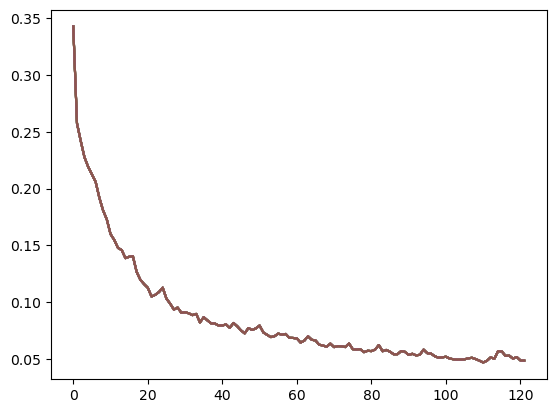

In [51]:
all_preds = []
# do one hot encoding requires all possible combinations to be same as training set
one_hot_circuit = pd.get_dummies(cleaned_permutations, columns = ['circuit', 'constructor', 'driver', 'teammate'])

# create a dataframe to store the results
final_results = pd.DataFrame(columns=['circuit', 'driver', 'pred_pos'])

for circuit in current_circuits: 
    one_hot_encoded_data = pd.get_dummies(data_train, columns = ['circuit', 'constructor', 'driver', 'teammate'])

    data_train_scaled = one_hot_encoded_data.copy()
    data_train_scaled.qualifyingPos = standard_scaler_scale(one_hot_encoded_data.qualifyingPos)
    data_train_scaled.points = standard_scaler_scale(one_hot_encoded_data.points)

    circuit_data = data_train_scaled.loc[data_train_scaled['circuit_' + circuit] == 1]

    train_set = circuit_data[circuit_data.year != 2023]
    test_set = circuit_data[circuit_data.year == 2023]

    X_train = train_set.drop(['position', 'year', 'points'],axis = 1)
    y_train = train_set['points']

    regr = MLPRegressor(
        hidden_layer_sizes=(500, 250, 100, 50), 
        max_iter=500,
        random_state=203043043
        ).fit(X_train, y_train)

    plt.plot(regr.loss_curve_)
    print(regr.best_loss_)

    X_test = test_set.drop(['position', 'year', 'points'],axis = 1)
    y_test = test_set.points

    pred = regr.predict(X_test)
    # resid = abs(y_test - pred)

    pred_unscaled = standard_scaler_unscale(pred, 
                                            one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    y_test_unscaled = standard_scaler_unscale(y_test, 
                                            one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)
    # plt.hist(pred_unscaled, bins = 20)

    this_season = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

    one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]

    X_test = one_hot_testing.drop(['position', 'year', 'points'],axis = 1)
    y_test = one_hot_testing['points']

    pred_vals = standard_scaler_unscale(regr.predict(X_test), one_hot_encoded_data.position.mean(), 
                                            one_hot_encoded_data.position.std()).astype(np.int32)

    print(sum((y_test - pred_vals)**2) / len(y_test))

In [52]:
for circuit in current_circuits: 
    circuit_data = data.loc[data['circuit'] == circuit]

    # one hot encode the categorical variables
    one_hot_encoded_data = pd.get_dummies(circuit_data, columns = ['race', 'circuit', 'constructor', 'driver', 'teammate'])

    # split the data into previous seasons for training and current season for testing 
    one_hot_training = one_hot_encoded_data.loc[one_hot_encoded_data['year'] != 2023]
    one_hot_testing = one_hot_encoded_data.loc[one_hot_encoded_data['year'] == 2023]
    
    # get the training and testing data
    X_train = one_hot_training.drop('position',axis = 1)
    y_train = one_hot_training['position']

    X_test = one_hot_testing.drop('position',axis = 1)
    y_test = one_hot_testing['position']

    # create the model
    regr = MLPRegressor(hidden_layer_sizes=(500, 250, 100, 50), max_iter=500, random_state=203043043).fit(X_train, y_train)


    print(circuit)
    print(y_test[:20])
    print(regr.predict(X_test[:20]))

    



NameError: name 'data' is not defined